### Import libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer, f1_score, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin


### Input & Output creation

In [ ]:
# read file and create output file
input = 'C:/welead/project/project_root/data/curated_dataset.csv'
output = 'C:/welead/project/project_root/'
df = pd.read_csv(input)


In [32]:
print(df.head())

    mpg  cylinders  displayments  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin_1  origin_2  origin_3  mpg_classes  
0          70       1.0       0.0       0.0            1  
1          70       1.0       0.0       0.0            0  
2          70       1.0       0.0       0.0            1  
3          70       1.0       0.0       0.0            0  
4          70       1.0       0.0       0.0            0  


In [33]:
# Separate features and target
X = df.drop(columns=['mpg', 'mpg_classes'])  # 'mpg_classes' is the column to predict
y = df['mpg_classes']

In [34]:
#first split the features from the target and then scale
# Scaling the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns=X.columns)

# Reversing the scaling if needed
# reversed_data = scaler.inverse_transform(scaled_data)

In [35]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Feature Selection

In [36]:
# Step 1. Filter Method: SelectKBest with chi2
for feat in range(2,10):
    print('\nfeat = ', feat)
    
    selector = SelectKBest(chi2, k=feat)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # Get selected features
    selected_features_filter = X_train.columns[selector.get_support()]
    print(f"Features selected by SelectKBest: {selected_features_filter.tolist()}")

    # Create a pipeline for model training
    pipeline = Pipeline([
        ('feature_selection', SelectKBest(chi2, k=feat)),
        ('classification', RandomForestClassifier(random_state=42))
    ])
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    # Print cross-validation results
    #print("Cross-Validation Accuracy Scores:", cv_scores)
    print(f"Mean CV Accuracy: {np.mean(cv_scores):.2f}")


feat =  2
Features selected by SelectKBest: ['cylinders', 'origin_3']
Mean CV Accuracy: 0.67

feat =  3
Features selected by SelectKBest: ['cylinders', 'displayments', 'origin_3']
Mean CV Accuracy: 0.69

feat =  4
Features selected by SelectKBest: ['cylinders', 'displayments', 'origin_1', 'origin_3']
Mean CV Accuracy: 0.68

feat =  5
Features selected by SelectKBest: ['cylinders', 'displayments', 'weight', 'origin_1', 'origin_3']
Mean CV Accuracy: 0.68

feat =  6
Features selected by SelectKBest: ['cylinders', 'displayments', 'horsepower', 'weight', 'origin_1', 'origin_3']
Mean CV Accuracy: 0.72

feat =  7
Features selected by SelectKBest: ['cylinders', 'displayments', 'horsepower', 'weight', 'origin_1', 'origin_2', 'origin_3']
Mean CV Accuracy: 0.73

feat =  8
Features selected by SelectKBest: ['cylinders', 'displayments', 'horsepower', 'weight', 'model year', 'origin_1', 'origin_2', 'origin_3']
Mean CV Accuracy: 0.82

feat =  9
Features selected by SelectKBest: ['cylinders', 'displa

In [37]:
# Step 2. Wrapper Method: Recursive Feature Elimination (RFE))
for feat in range(2,10):
    print('\nfeat = ', feat)
    model = LogisticRegression(solver='liblinear')
    rfe = RFE(estimator=model, n_features_to_select=feat)
    rfe.fit(X_train, y_train)

    selected_features_wrapper = X_train.columns[rfe.support_]
    print(f"Features selected by RFE: {selected_features_wrapper.tolist()}")

    #Create a pipeline for model training
    pipeline = Pipeline([
        ('feature_selection', RFE(estimator=model, n_features_to_select=feat)),
        ('classification', RandomForestClassifier(random_state=42))
    ])
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    # Print cross-validation results
    #print("Cross-Validation Accuracy Scores:", cv_scores)
    print(f"Mean CV Accuracy: {np.mean(cv_scores):.2f}")


feat =  2
Features selected by RFE: ['cylinders', 'weight']
Mean CV Accuracy: 0.60

feat =  3
Features selected by RFE: ['cylinders', 'weight', 'model year']
Mean CV Accuracy: 0.76

feat =  4
Features selected by RFE: ['cylinders', 'horsepower', 'weight', 'model year']
Mean CV Accuracy: 0.81

feat =  5
Features selected by RFE: ['cylinders', 'displayments', 'horsepower', 'weight', 'model year']
Mean CV Accuracy: 0.81

feat =  6
Features selected by RFE: ['cylinders', 'displayments', 'horsepower', 'weight', 'model year', 'origin_3']
Mean CV Accuracy: 0.83

feat =  7
Features selected by RFE: ['cylinders', 'displayments', 'horsepower', 'weight', 'acceleration', 'model year', 'origin_3']
Mean CV Accuracy: 0.83

feat =  8
Features selected by RFE: ['cylinders', 'displayments', 'horsepower', 'weight', 'acceleration', 'model year', 'origin_1', 'origin_3']
Mean CV Accuracy: 0.83

feat =  9
Features selected by RFE: ['cylinders', 'displayments', 'horsepower', 'weight', 'acceleration', 'model 

In [38]:
#Step 3. Embedded Method: Feature Importance from Random Forest)

# Custom transformer for feature selection
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, n_features):
        self.n_features = n_features
        self.selected_features = None

    def fit(self, X_train, y_train):
        # Use RandomForestClassifier to compute feature importances
        rf = RandomForestClassifier(random_state=42)
        rf.fit(X_train, y_train)
        # Select top `n_features`
        feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
        self.selected_features = feature_importances.nlargest(self.n_features).index
        print(f"Features selected by Random Forest: {self.selected_features.tolist()}")
        return self

    def transform(self, X_test):
        # Transform the dataset to keep only selected features
        return X_test[self.selected_features]

for feat in range(2,10):
    print('\nfeat = ', feat)

    #Create a pipeline for model training
    pipeline = Pipeline([
        ('feature_selection', FeatureSelector(n_features=feat)),
        ('classification', RandomForestClassifier(random_state=42))
    ])
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    # Print cross-validation results
    #print("Cross-Validation Accuracy Scores:", cv_scores)
    print(f"Mean CV Accuracy: {np.mean(cv_scores):.2f}")


feat =  2
Features selected by Random Forest: ['weight', 'displayments']
Features selected by Random Forest: ['horsepower', 'displayments']
Features selected by Random Forest: ['displayments', 'weight']
Features selected by Random Forest: ['horsepower', 'weight']
Features selected by Random Forest: ['horsepower', 'displayments']
Mean CV Accuracy: 0.69

feat =  3
Features selected by Random Forest: ['weight', 'displayments', 'horsepower']
Features selected by Random Forest: ['horsepower', 'displayments', 'weight']
Features selected by Random Forest: ['displayments', 'weight', 'horsepower']
Features selected by Random Forest: ['horsepower', 'weight', 'displayments']
Features selected by Random Forest: ['horsepower', 'displayments', 'weight']
Mean CV Accuracy: 0.71

feat =  4
Features selected by Random Forest: ['weight', 'displayments', 'horsepower', 'model year']
Features selected by Random Forest: ['horsepower', 'displayments', 'weight', 'model year']
Features selected by Random Fores

In [39]:
best_params = {}  # Empty dictionary to store the best parameters for each model

In [40]:
# all methods from the Feature Selection showed that the best results
# derive from the use of all 9 features (except mpg and mpg_classes)

X_selected = X[selected_features_filter]  

best_params["feature_selection"] = X[selected_features_filter].columns.tolist()
print(best_params["feature_selection"])

['cylinders', 'displayments', 'horsepower', 'weight', 'acceleration', 'model year', 'origin_1', 'origin_2', 'origin_3']


### Convert categorical columns to numerical columns

In [41]:
#column types
df.dtypes

mpg             float64
cylinders         int64
displayments    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin_1        float64
origin_2        float64
origin_3        float64
mpg_classes       int64
dtype: object

In [42]:
#Encode mpg_classes to numerical values 
df['mpg_classes'] = df['mpg_classes'].astype('int')
df.dtypes

mpg             float64
cylinders         int64
displayments    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin_1        float64
origin_2        float64
origin_3        float64
mpg_classes       int64
dtype: object

### Train Test Split 

In [43]:
# Dataset: X_selected
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

### Model Selection 

In [44]:
# List of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(random_state=42)
}

# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

In [45]:
# Training and evaluating models
results = {}

for model_name, model in models.items():
    print(f"Validating {model_name}...")
    
    # Create pipeline with StandardScaler and the model
    pipeline = Pipeline([
        ("scaler", StandardScaler()),  # Step 1: Scale data
        ("classifier", model)          # Step 2: Train model
    ])

    
    # Train pipeline
    pipeline.fit(X_train, y_train)
    
    # Evaluate model
    y_pred = pipeline.predict(X_test)
    accuracy = pipeline.score(X_test, y_test)
    results[model_name] = accuracy
    
    # Print classification report
    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    
# Comparing results
print("Model Evaluation Results (Accuracy)")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.2f}")

Validating Logistic Regression...
Model: Logistic Regression
Confusion Matrix:
[[18  7  0  0]
 [ 1 14  5  0]
 [ 0  1 17  2]
 [ 0  1  1 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.72      0.82        25
           1       0.61      0.70      0.65        20
           2       0.74      0.85      0.79        20
           3       0.88      0.88      0.88        17

    accuracy                           0.78        82
   macro avg       0.79      0.79      0.79        82
weighted avg       0.80      0.78      0.78        82

--------------------------------------------------
Validating Decision Tree...
Model: Decision Tree
Confusion Matrix:
[[19  6  0  0]
 [ 1 14  3  2]
 [ 0  1 18  1]
 [ 0  0  3 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.76      0.84        25
           1       0.67      0.70      0.68        20
           2       0.75      0.90    

Validating Logistic Regression...
Logistic Regression CV Accuracy: 0.7778
----------------------------------------
Validating Decision Tree...
Decision Tree CV Accuracy: 0.7501
----------------------------------------
Validating Random Forest...
Random Forest CV Accuracy: 0.8182
----------------------------------------
Validating Gradient Boosting...
Gradient Boosting CV Accuracy: 0.8027
----------------------------------------
Validating k-Nearest Neighbors...
k-Nearest Neighbors CV Accuracy: 0.7839
----------------------------------------
Validating Support Vector Machine...
Support Vector Machine CV Accuracy: 0.7869
----------------------------------------


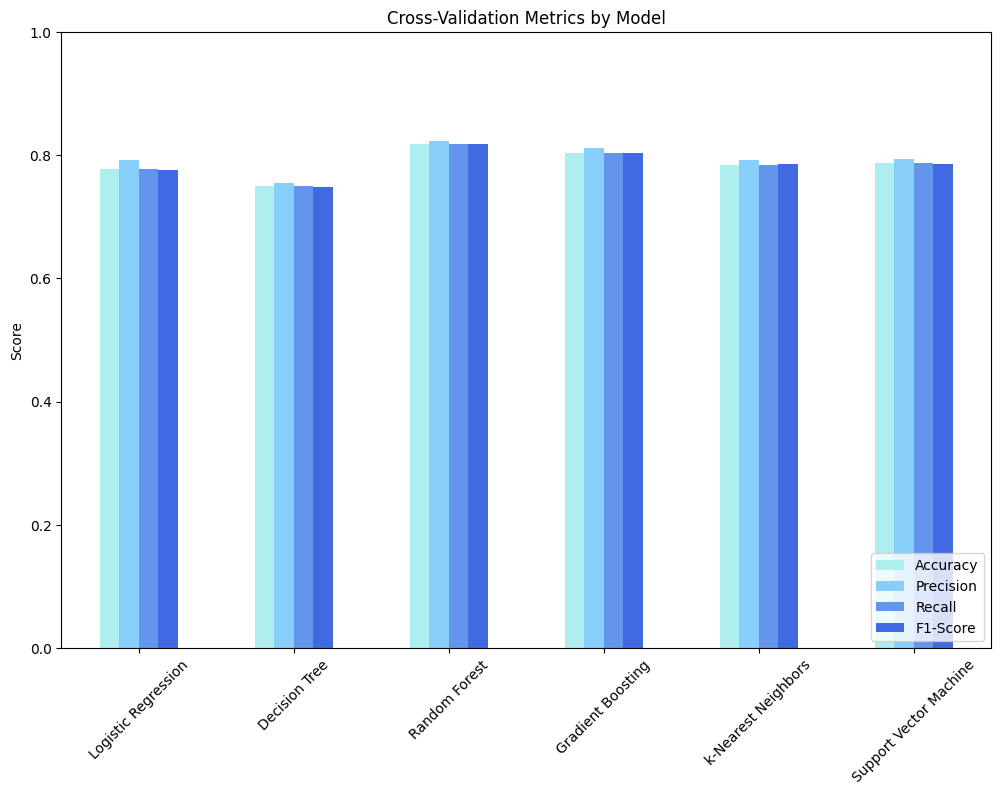

In [46]:
# Container for results
results = {}

# Evaluate each model using cross-validation
for model_name, model in models.items():
    print(f"Validating {model_name}...")
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", model)
    ])
    
    cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scoring)
    
    # Store mean metrics in the results dictionary
    results[model_name] = {
        "Accuracy": cv_results['test_accuracy'].mean(),
        "Precision": cv_results['test_precision'].mean(),
        "Recall": cv_results['test_recall'].mean(),
        "F1-Score": cv_results['test_f1'].mean()
    }
    
    print(f"{model_name} CV Accuracy: {results[model_name]['Accuracy']:.4f}")
    print("-" * 40)

blue_palette = ["paleturquoise", "lightskyblue", "cornflowerblue", "royalblue"]

# Convert results dictionary to DataFrame for visualization
results_df = pd.DataFrame(results).T  # transpose so that models are rows

# Plotting the metrics
results_df.plot(kind="bar", figsize=(12, 8), color=blue_palette)
plt.title("Cross-Validation Metrics by Model")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()


In [47]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision (macro):", precision_score(y_true, y_pred, average='macro'))
    print("Recall (macro):", recall_score(y_true, y_pred, average='macro'))
    print("F1-Score (macro):", f1_score(y_true, y_pred, average='macro'))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Low', 'Med-Low', 'Med-High', 'High'],
                yticklabels=['Low', 'Med-Low', 'Med-High', 'High'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


Decision Tree:
Accuracy: 0.8292682926829268
Precision (macro): 0.8369444444444445
Recall (macro): 0.8258823529411765
F1-Score (macro): 0.8274503222341568

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.78      0.70      0.74        20
           2       0.72      0.90      0.80        20
           3       0.93      0.82      0.88        17

    accuracy                           0.83        82
   macro avg       0.84      0.83      0.83        82
weighted avg       0.84      0.83      0.83        82



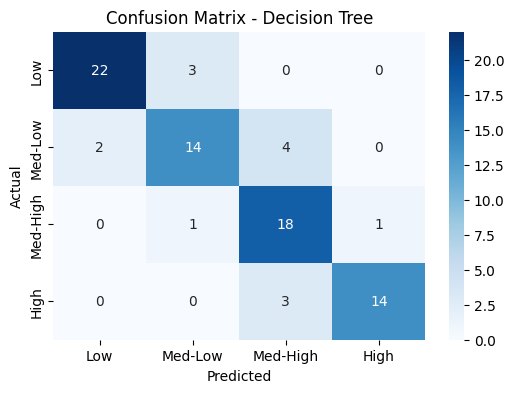


K-Nearest Neighbors:
Accuracy: 0.8048780487804879
Precision (macro): 0.8130705345379259
Recall (macro): 0.8058823529411765
F1-Score (macro): 0.8063120735011534

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.80      0.87        25
           1       0.65      0.75      0.70        20
           2       0.77      0.85      0.81        20
           3       0.88      0.82      0.85        17

    accuracy                           0.80        82
   macro avg       0.81      0.81      0.81        82
weighted avg       0.82      0.80      0.81        82



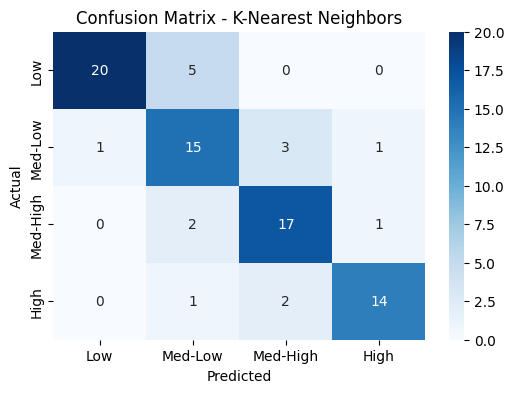


Logistic Regression:
Accuracy: 0.7804878048780488
Precision (macro): 0.794386862296406
Recall (macro): 0.7880882352941176
F1-Score (macro): 0.785598806118642

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82        25
           1       0.61      0.70      0.65        20
           2       0.74      0.85      0.79        20
           3       0.88      0.88      0.88        17

    accuracy                           0.78        82
   macro avg       0.79      0.79      0.79        82
weighted avg       0.80      0.78      0.78        82



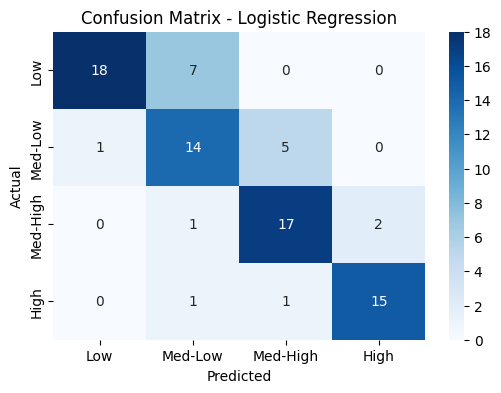

In [48]:
# Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
pipeline_dt = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", dt_model)
])
pipeline_dt.fit(X_train, y_train)
dt_pred = pipeline_dt.predict(X_test)
evaluate_model(y_test, dt_pred, "Decision Tree")

# k-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
pipeline_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", knn_model)
])
pipeline_knn.fit(X_train, y_train)
knn_pred = pipeline_knn.predict(X_test)
evaluate_model(y_test, knn_pred, "K-Nearest Neighbors")

# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
pipeline_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", logistic_model)
])
pipeline_lr.fit(X_train, y_train)
lr_pred = pipeline_lr.predict(X_test)
evaluate_model(y_test, lr_pred, "Logistic Regression")


### Find best parameters

In [49]:
def print_results(results):
    print('Best params: {}\n'.format(results.best_params_))
    best_params = results.best_params_
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std * 2, 3), params))

    return best_params
    
   

In [50]:
def get_best_results(results):
    best_params = results.best_params_
    return best_params

In [51]:
LogisticRegression(random_state=42).get_params()

parameters = {
    'max_iter': [100, 500, 1000, 5000],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga']
}

log_reg = LogisticRegression(random_state=42)
grid_search = GridSearchCV(log_reg, parameters, cv=5)
grid_search.fit(X_train, y_train)

best_params["logistic_regression"] = print_results(grid_search)
print_results(grid_search)

C:\Users\iwann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\iwann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\iwann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\iwann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_sag.py:348: Conve

Best params: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

0.244 (+/-0.013) for {'C': 0.0001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.244 (+/-0.013) for {'C': 0.0001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
0.704 (+/-0.058) for {'C': 0.0001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.617 (+/-0.159) for {'C': 0.0001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
nan (+/-nan) for {'C': 0.0001, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 0.0001, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
0.244 (+/-0.013) for {'C': 0.0001, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
0.244 (+/-0.013) for {'C': 0.0001, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
0.704 (+/-0.058) for {'C': 0.0001, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
0.698 (+/-0.058) for {'C': 0.0001, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
nan (+/-nan) fo

C:\Users\iwann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\iwann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
320 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\iwann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache

{'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [52]:
DecisionTreeClassifier().get_params()

parameters = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

dtc = DecisionTreeClassifier()
grid_search = GridSearchCV(dtc, parameters, cv=5)
grid_search.fit(X_train, y_train)


best_params["decision_tree_classifier"] = print_results(grid_search)
print_results(grid_search)

Best params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

0.722 (+/-0.064) for {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.722 (+/-0.064) for {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.722 (+/-0.064) for {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.722 (+/-0.064) for {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.722 (+/-0.064) for {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.722 (+/-0.064) for {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.725 (+/-0.067) for {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 5, 'm

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [53]:
# ~ 5 mins
RandomForestClassifier(random_state=42).get_params()

parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rfc, parameters, cv=5)
grid_search.fit(X_train, y_train)


best_params["random_forest_classifier"] = print_results(grid_search)
print_results(grid_search)

Best params: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

0.824 (+/-0.126) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.821 (+/-0.114) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.834 (+/-0.097) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
0.821 (+/-0.087) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.827 (+/-0.075) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
0.83 (+/-0.072) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_sample

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [54]:
# ~ 2 mins
GradientBoostingClassifier(random_state=42).get_params()

parameters = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'subsample': [0.8, 1.0]
}

gbc = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gbc, parameters, cv=5)
grid_search.fit(X_train, y_train)

best_params["gradient_boosting_classifier"] = print_results(grid_search)
print_results(grid_search)

Best params: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}

0.769 (+/-0.12) for {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
0.741 (+/-0.076) for {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}
0.787 (+/-0.11) for {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
0.787 (+/-0.093) for {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 1.0}
0.766 (+/-0.122) for {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}
0.741 (+/-0.076) for {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 1.0}
0.784 (+/-0.111) for {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
0.787 (+/-0.093) 

{'learning_rate': 0.01,
 'max_depth': 5,
 'min_samples_split': 5,
 'n_estimators': 100,
 'subsample': 0.8}

In [55]:
KNeighborsClassifier().get_params()

parameters = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, parameters, cv=5)
grid_search.fit(X_train, y_train)


best_params["k_neighbors_classifier"] = print_results(grid_search)
print_results(grid_search)

Best params: {'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

0.661 (+/-0.132) for {'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.667 (+/-0.134) for {'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.661 (+/-0.132) for {'metric': 'euclidean', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.667 (+/-0.134) for {'metric': 'euclidean', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.682 (+/-0.09) for {'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.682 (+/-0.114) for {'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.682 (+/-0.09) for {'metric': 'euclidean', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.682 (+/-0.114) for {'metric': 'euclidean', 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
0.682 (+/-0.068) for {'metric': 'euclidean', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
0.685 (+/-0.043) for {'metric': 'euclidean', 'n_neighbors': 7, 'p': 1, 'we

{'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [56]:
# ~  mins
SVC(random_state=42).get_params()

parameters = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1], 
    'kernel': ['linear', 'rbf']
}

svc = SVC(random_state=42)
grid_search = GridSearchCV(svc, parameters, cv=5)
grid_search.fit(X_train, y_train)


best_params["svc"] = print_results(grid_search)
print_results(grid_search)


Best params: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}

0.772 (+/-0.085) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
0.262 (+/-0.003) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.772 (+/-0.085) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
0.262 (+/-0.003) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.772 (+/-0.085) for {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
0.262 (+/-0.003) for {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.747 (+/-0.064) for {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
0.475 (+/-0.123) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.747 (+/-0.064) for {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
0.299 (+/-0.024) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.747 (+/-0.064) for {'C': 1, 'gamma': 1, 'kernel': 'linear'}
0.281 (+/-0.023) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.719 (+/-0.012) for {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
0.478 (+/-0.122) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.719 (+/-0.012) for {'C': 10, 'gamma': 0.1, 'kernel'

{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}

In [57]:
print(best_params)

{'feature_selection': ['cylinders', 'displayments', 'horsepower', 'weight', 'acceleration', 'model year', 'origin_1', 'origin_2', 'origin_3'], 'logistic_regression': {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}, 'decision_tree_classifier': {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}, 'random_forest_classifier': {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}, 'gradient_boosting_classifier': {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}, 'k_neighbors_classifier': {'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}, 'svc': {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}}


In [ ]:
import os
import yaml

config_filename = 'C:/welead/project/project_root/config.yaml'

# Check if the file exists and delete it
if os.path.exists(config_filename):
    os.remove(config_filename)
    print(f"Deleted old {config_filename}")


# Save the dictionary to a YAML file
with open(config_filename, "w") as file:
    yaml.dump(best_params, file, default_flow_style=False)

print(f"New {config_filename} file has been created successfully!")
    

Deleted old C:/welead/project/config.yaml
New C:/welead/project/config.yaml file has been created successfully!
